In [1]:
!pip install squarify

In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
# Assign url of file: url
url = 'https://raw.githubusercontent.com/FanaOmar/Market-Basket/main/Market_Basket_Data.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, header= None)

# Print the head of the DataFrame
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7501, 20)

In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# checking the random entries in the data
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
6398,ground beef,milk,energy bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1525,mineral water,avocado,eggs,cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4337,mineral water,black tea,almonds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2302,eggs,french fries,brownies,strawberries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3300,cookies,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4425,burgers,ham,chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2058,tomatoes,milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7313,rice,french fries,cottage cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2854,burgers,red wine,whole wheat pasta,butter,cereals,french fries,hot dogs,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5399,burgers,shrimp,frozen vegetables,tomatoes,parmesan cheese,chocolate,french fries,escalope,body spray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,chocolate,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [8]:
#To check null values
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [9]:
!pip install wordcloud

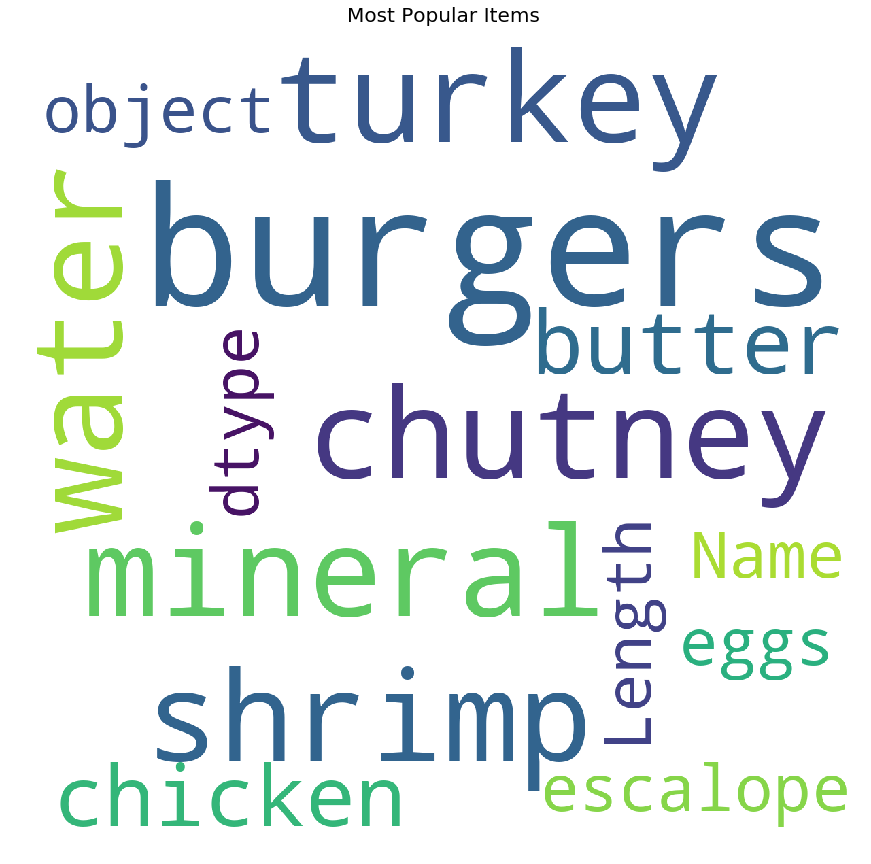

In [10]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

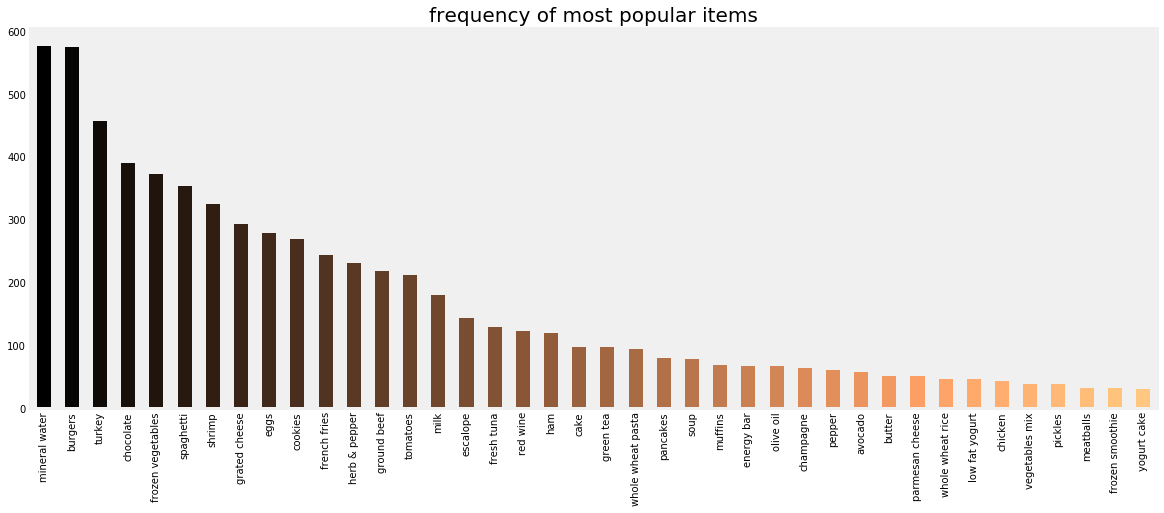

In [11]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [12]:
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

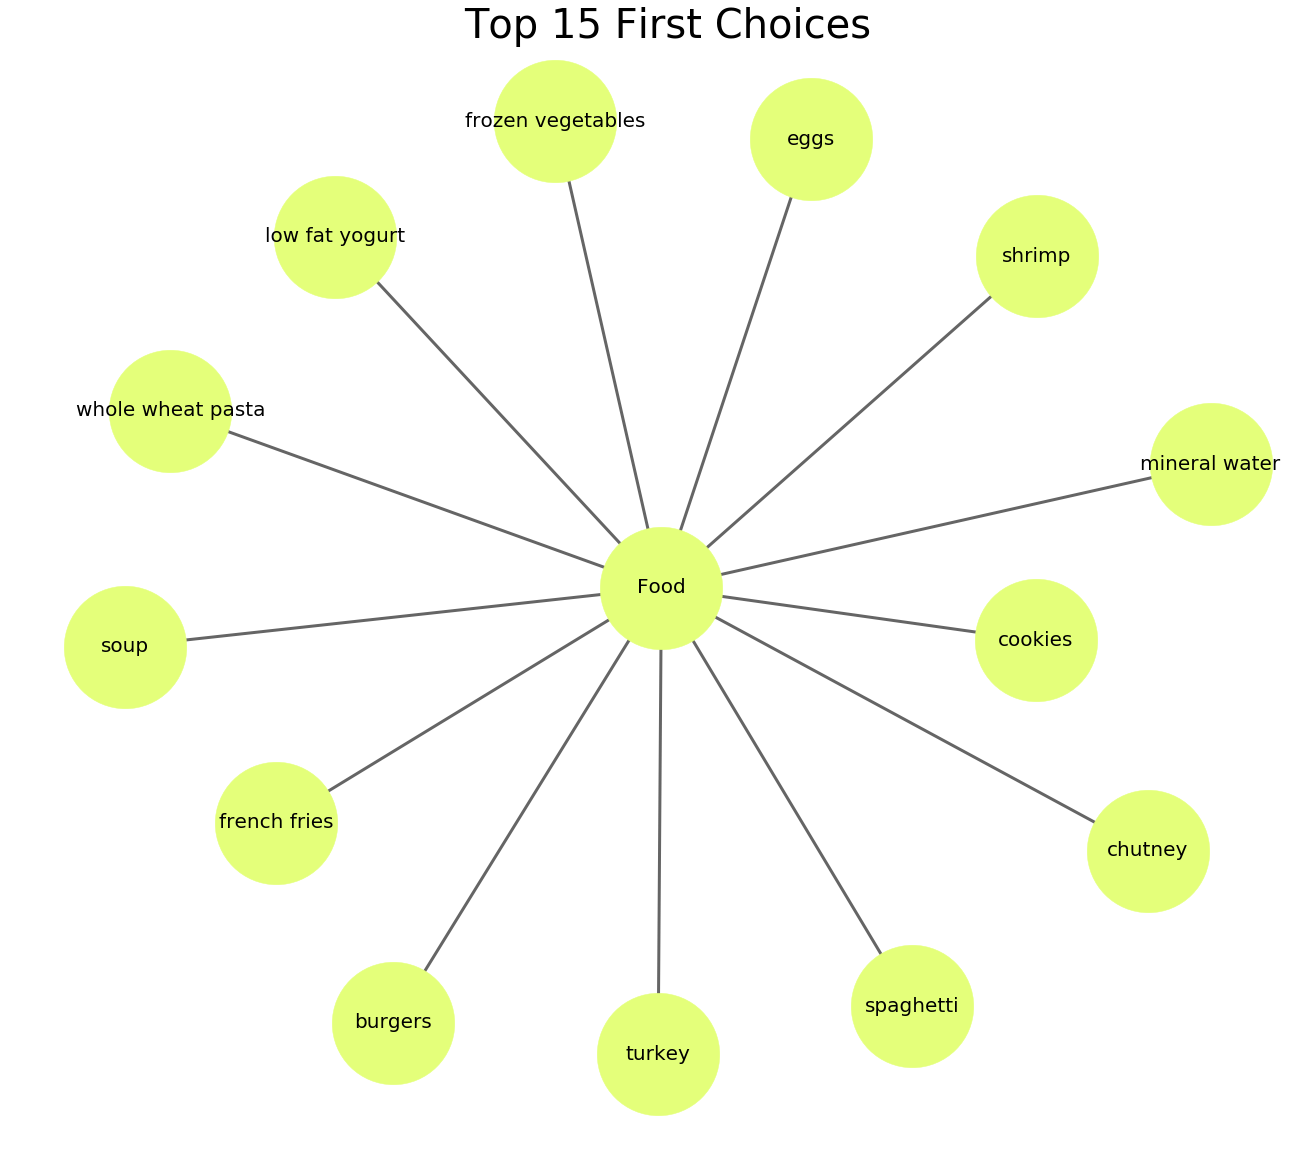

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [14]:
df['secondchoice'] = 'Second Choice'
secondchoice = df.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

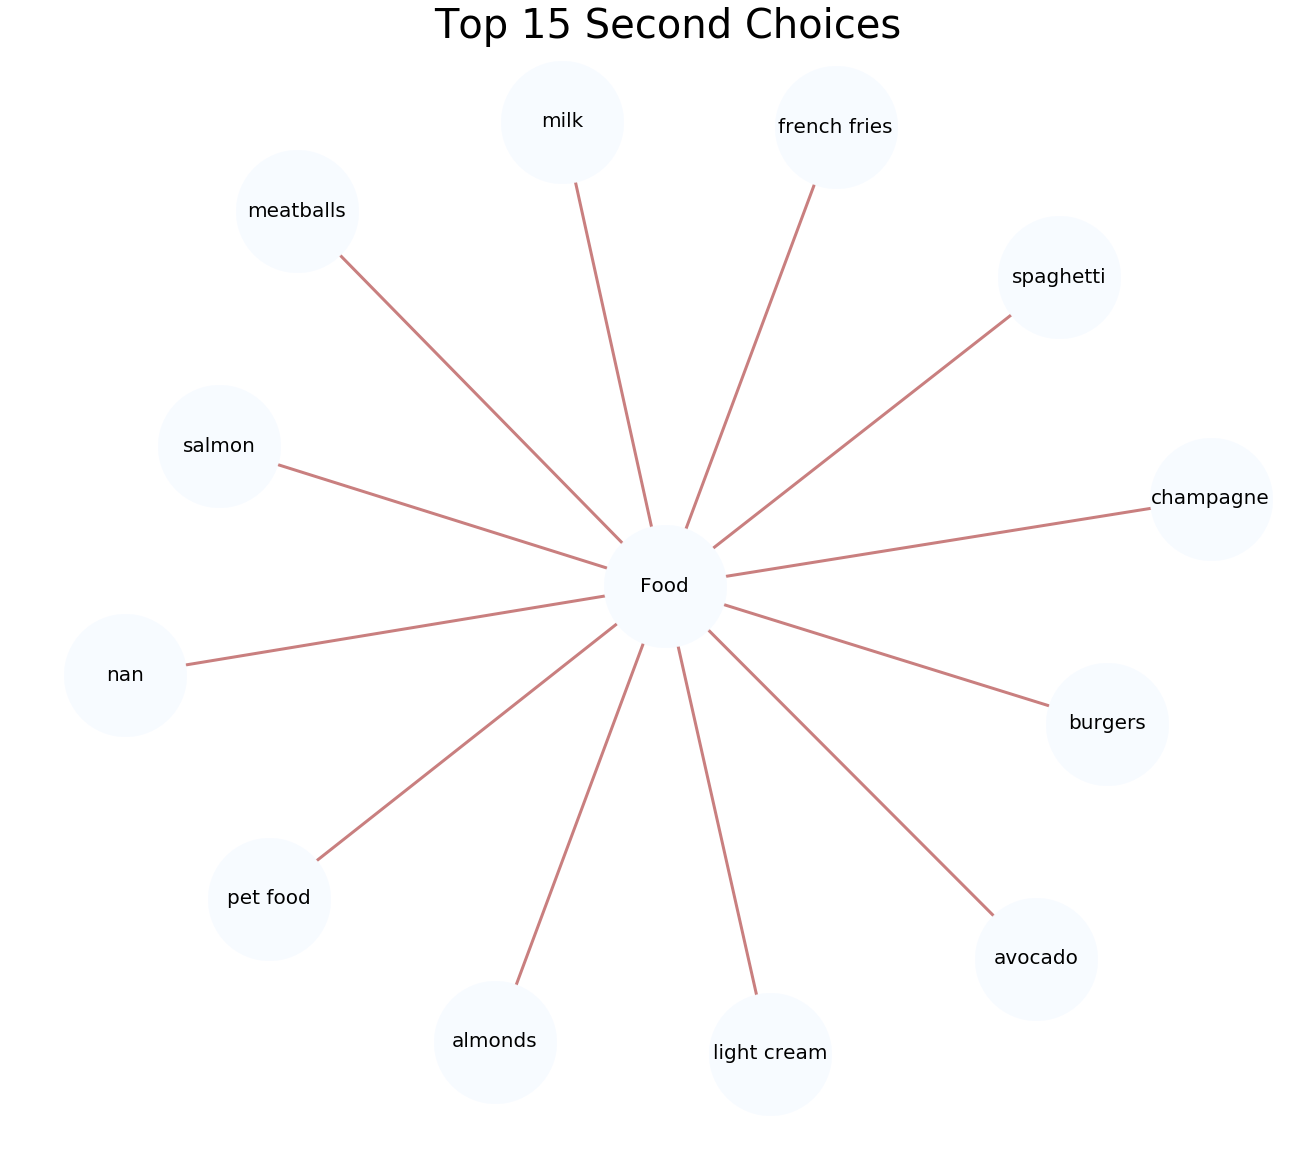

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [16]:
df['thirdchoice'] = 'Third Choice'
secondchoice = df.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

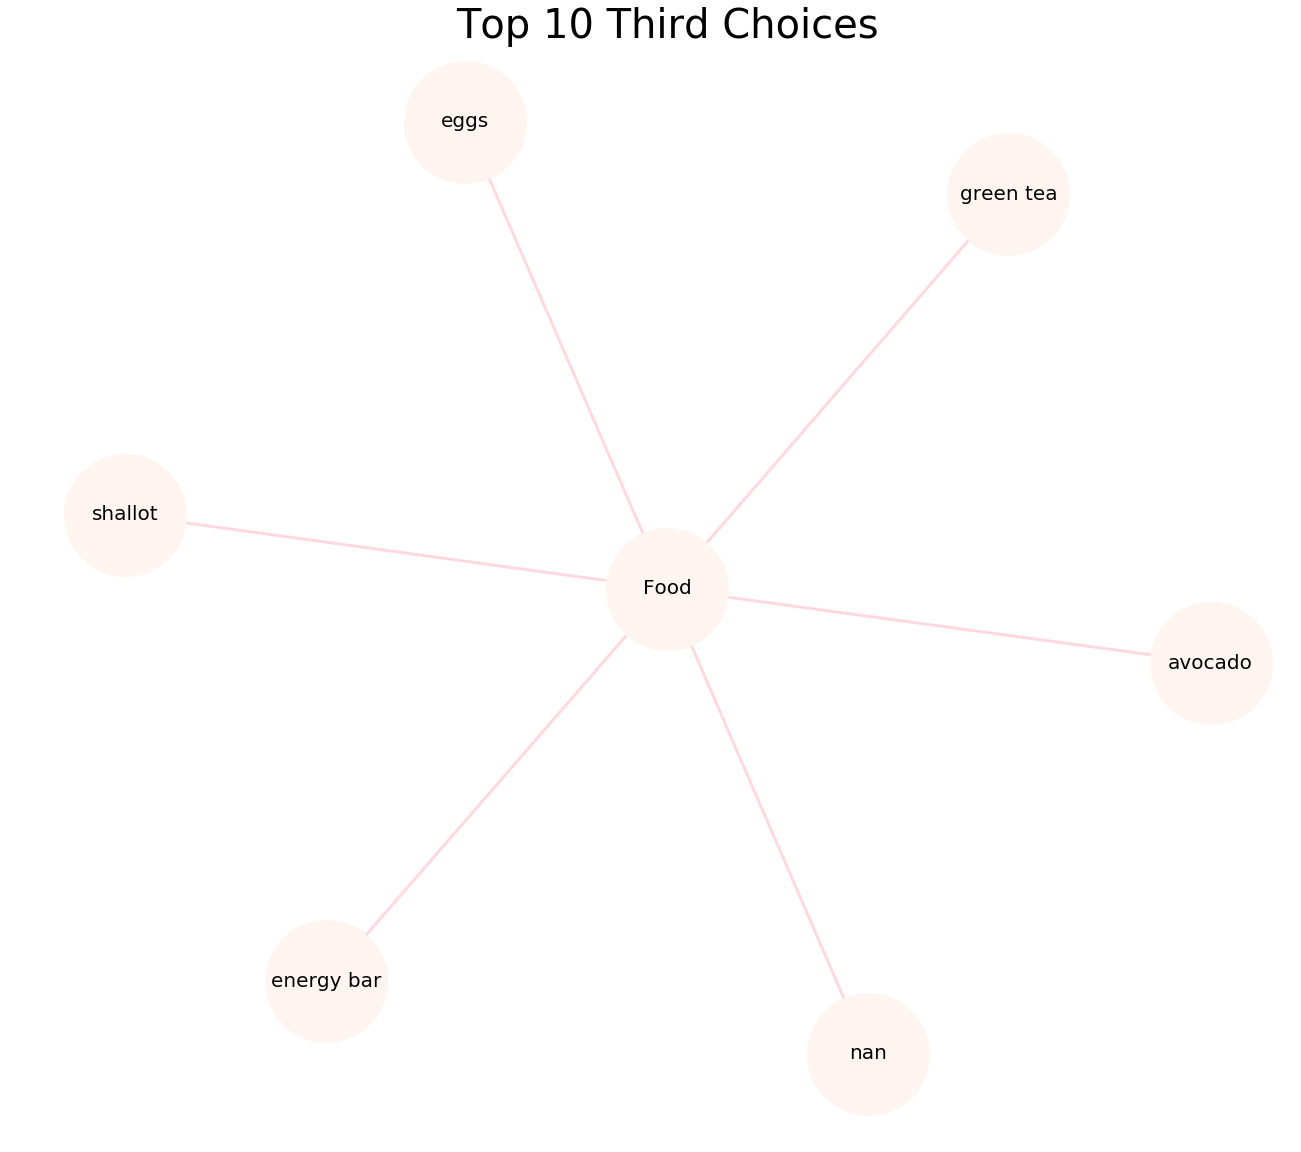

In [17]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

In [18]:
!pip install networkx

In [19]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [20]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [22]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

# checking the shape
data.shape

(7501, 40)

In [23]:
# let's check the columns
data.columns

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake'],
      dtype='object')

In [24]:
# getting the head of the data

data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,butter,parmesan cheese,whole wheat rice,low fat yogurt,chicken,vegetables mix,pickles,meatballs,frozen smoothie,yogurt cake
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [25]:
#Apriori Algorithm
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 3% support:
apriori(data, min_support = 0.003, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
995,0.003333,"(milk, ground beef, mineral water, eggs)"
996,0.003066,"(spaghetti, frozen vegetables, ground beef, ch..."
997,0.003466,"(spaghetti, frozen vegetables, milk, chocolate)"
998,0.003066,"(chocolate, spaghetti, ground beef, eggs)"


In [26]:
frequent_itemsets = apriori(data, min_support = 0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
995,0.003333,"(milk, ground beef, mineral water, eggs)",4
996,0.003066,"(spaghetti, frozen vegetables, ground beef, ch...",4
997,0.003466,"(spaghetti, frozen vegetables, milk, chocolate)",4
998,0.003066,"(chocolate, spaghetti, ground beef, eggs)",4


In [27]:
# getting th item sets with length = 2 and support more than 3%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.003) ]

,support,itemsets,length
40,0.024397,"(burgers, mineral water)",2
41,0.019197,"(turkey, mineral water)",2
42,0.052660,"(mineral water, chocolate)",2
43,0.035729,"(frozen vegetables, mineral water)",2
44,0.059725,"(spaghetti, mineral water)",2
...,...,...,...
495,0.004399,"(chicken, low fat yogurt)",2
496,0.007332,"(frozen smoothie, low fat yogurt)",2
497,0.003200,"(chicken, meatballs)",2
498,0.006666,"(chicken, frozen smoothie)",2


In [28]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 4% support:
apriori(data, min_support = 0.004, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
670,0.004133,"(milk, chocolate, mineral water, eggs)"
671,0.004399,"(spaghetti, frozen vegetables, ground beef, mi..."
672,0.004533,"(spaghetti, frozen vegetables, mineral water, ..."
673,0.004399,"(milk, spaghetti, mineral water, eggs)"


In [29]:
frequent_itemsets = apriori(data, min_support = 0.004, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
670,0.004133,"(milk, chocolate, mineral water, eggs)",4
671,0.004399,"(spaghetti, frozen vegetables, ground beef, mi...",4
672,0.004533,"(spaghetti, frozen vegetables, mineral water, ...",4
673,0.004399,"(milk, spaghetti, mineral water, eggs)",4


In [30]:
# getting th item sets with length = 2 and support more than 4%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.004) ]

,support,itemsets,length
40,0.024397,"(burgers, mineral water)",2
41,0.019197,"(turkey, mineral water)",2
42,0.052660,"(mineral water, chocolate)",2
43,0.035729,"(frozen vegetables, mineral water)",2
44,0.059725,"(spaghetti, mineral water)",2
...,...,...,...
416,0.005466,"(chicken, whole wheat rice)",2
417,0.005999,"(frozen smoothie, whole wheat rice)",2
418,0.004399,"(chicken, low fat yogurt)",2
419,0.007332,"(frozen smoothie, low fat yogurt)",2


In [31]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 4% support:
apriori(data, min_support = 0.004, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
...,...,...
670,0.004133,"(milk, chocolate, mineral water, eggs)"
671,0.004399,"(spaghetti, frozen vegetables, ground beef, mi..."
672,0.004533,"(spaghetti, frozen vegetables, mineral water, ..."
673,0.004399,"(milk, spaghetti, mineral water, eggs)"


In [32]:
# getting th item sets with length = 4 and support more than 4%

frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.004) ]

,support,itemsets,length
667,0.004133,"(spaghetti, frozen vegetables, mineral water, ...",4
668,0.004533,"(chocolate, spaghetti, mineral water, eggs)",4
669,0.004933,"(milk, spaghetti, mineral water, chocolate)",4
670,0.004133,"(milk, chocolate, mineral water, eggs)",4
671,0.004399,"(spaghetti, frozen vegetables, ground beef, mi...",4
672,0.004533,"(spaghetti, frozen vegetables, mineral water, ...",4
673,0.004399,"(milk, spaghetti, mineral water, eggs)",4
674,0.004399,"(spaghetti, ground beef, mineral water, milk)",4


In [33]:
# To find the value of the support, confidence, lift and conviction
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
1,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
2,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093
3,(mineral water),(turkey),0.238368,0.062525,0.019197,0.080537,1.288075,0.004293,1.019590
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


In [36]:
# To find the value of the support, confidence, lift and conviction
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(burgers),(mineral water),0.087188,0.238368,0.024397,0.279817,1.173883,0.003614,1.057552
1,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889
2,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1.288075,0.004293,1.099093
3,(mineral water),(turkey),0.238368,0.062525,0.019197,0.080537,1.288075,0.004293,1.019590
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


In [37]:
# To filter the itemsets that has lift value equals or more than 1 and value of confidence equals or more than 0.5
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
712,"(turkey, frozen vegetables)",(mineral water),0.008799,0.238368,0.004399,0.500000,2.097595,0.002302,1.523264
731,"(turkey, milk)",(mineral water),0.011332,0.238368,0.006133,0.541176,2.270338,0.003431,1.659967
805,"(soup, chocolate)",(mineral water),0.010132,0.238368,0.005599,0.552632,2.318395,0.003184,1.702471
811,"(olive oil, chocolate)",(mineral water),0.016398,0.238368,0.008266,0.504065,2.114649,0.004357,1.535749
823,"(chicken, chocolate)",(mineral water),0.014665,0.238368,0.007599,0.518182,2.173871,0.004103,1.580745
858,"(frozen vegetables, ground beef)",(mineral water),0.016931,0.238368,0.009199,0.543307,2.279277,0.005163,1.667711
892,"(soup, frozen vegetables)",(mineral water),0.007999,0.238368,0.005066,0.633333,2.656954,0.003159,2.077178
898,"(olive oil, frozen vegetables)",(mineral water),0.011332,0.238368,0.006532,0.576471,2.418404,0.003831,1.798297
986,"(soup, spaghetti)",(mineral water),0.014265,0.238368,0.007466,0.523364,2.195614,0.004065,1.597933
1046,"(olive oil, shrimp)",(mineral water),0.008132,0.238368,0.004533,0.557377,2.338303,0.002594,1.720724
